# 0727 필기

### pandas에는 7가지의 데이터타입이 있다.
- object (string)
- int64
- float64
- category
   - 문자지만 경우가 한정적인 데이터 (ex) 남자/여자
- date
- -
- -
....

### pandas는 1. 전처리 2. EDA 하는 애여

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('data/nobel_winners_dirty.json')

In [12]:
df.dtypes

born_in           object
category          object
country           object
date_of_birth     object
date_of_death     object
gender            object
link              object
name              object
place_of_birth    object
place_of_death    object
text              object
year               int64
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
born_in           1052 non-null object
category          1052 non-null object
country           1052 non-null object
date_of_birth     1044 non-null object
date_of_death     1044 non-null object
gender            1040 non-null object
link              1052 non-null object
name              1052 non-null object
place_of_birth    1044 non-null object
place_of_death    1044 non-null object
text              1052 non-null object
year              1052 non-null int64
dtypes: int64(1), object(11)
memory usage: 98.7+ KB


In [15]:
df.shape

(1052, 12)

In [5]:
df.head()

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,Institut de Droit International,None,None,"Institut de Droit International , Peace, 1904",1904
4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909


### 비어있는 행 처리방법
1. 비어있는 것을 없애버려라.
   - 그 주변의 평균을 넣는 방법
   - 전체 평균을 넣는 방법
   - 인터폴레이션?
   

2. 비어있는 것을 채워라.

### object는 string이라서 string으로 할 수 있는 통계를 보여준다.

In [16]:
df.describe(include=['object'])

,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text
count,1052,1052,1052,1044,1044,1040,1052,1052,1044,1044,1052
unique,40,7,59,853,563,2,893,998,735,410,1043
top,,Physiology or Medicine,United States,9 May 1947,,male,http://en.wikipedia.org/wiki/Michael_Levitt,César Milstein,,,"Ernest Rutherford , born in New Zealand , Che..."
freq,910,250,350,4,362,982,4,2,29,409,2


In [32]:
len(df[df.category=='Chemistry'].country.unique())

25

In [28]:
df.loc[df.category=='Chemistry']['country'].unique()

array(['', 'Belgium', 'Denmark', 'Czech Republic', 'France', 'Germany',
       'Israel', 'South Africa', 'United Kingdom', 'United States',
       'Taiwan', 'Switzerland', 'Sweden', 'Russia', 'Poland', 'Norway',
       'Netherlands', 'Japan', 'Italy', 'Hungary', 'Finland', 'Egypt',
       'Canada', 'Austria', 'Argentina'], dtype=object)

In [36]:
df.columns

Index(['born_in', 'category', 'country', 'date_of_birth', 'date_of_death',
       'gender', 'link', 'name', 'place_of_birth', 'place_of_death', 'text',
       'year'],
      dtype='object')

### slicing, indexing 편하게 하기 위해서 set_index를 한다.

In [45]:
dfset = df.set_index('name')

In [50]:
dfset

,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year
name,,,,,,,,,,,
César Milstein,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
Ivo Andric *,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
Vladimir Prelog *,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
Institut de Droit International,,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,None,None,"Institut de Droit International , Peace, 1904",1904
Auguste Beernaert,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
Maurice Maeterlinck,,Literature,Belgium,29 August 1862,6 May 1949,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
Henri La Fontaine,,Peace,Belgium,22 April 1854,14 May 1943,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913
Jules Bordet,,Physiology or Medicine,Belgium,13 June 1870,6 April 1961,male,http://en.wikipedia.org/wiki/Jules_Bordet,"Soignies, Belgium",,"Jules Bordet , Physiology or Medicine, 1919",1919
Corneille Heymans,,Physiology or Medicine,Belgium,28 March 1892,18 July 1968,male,http://en.wikipedia.org/wiki/Corneille_Heymans,"Ghent , Flanders","Knokke , Flanders","Corneille Heymans , Physiology or Medicine, 1938",1938


In [56]:
dfset = df.set_index('name', drop=True, inplace=True)

In [61]:
df.loc['César Milstein']

,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year
name,,,,,,,,,,,
César Milstein,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
César Milstein,,Physiology or Medicine,United Kingdom,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , born in Argentina , Physiolo...",1984


In [62]:
df.reset_index(inplace=True)

이렇게도 지정이 가능하다.

In [42]:
bi_col = df.born_in

In [64]:
bi_col.head()

0                          
1    Bosnia and Herzegovina
2    Bosnia and Herzegovina
3                          
4                          
Name: born_in, dtype: object

In [71]:
df[df.year>2000].head()

,name,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year
13,François Englert,,Physics,Belgium,6 November 1932,,male,http://en.wikipedia.org/wiki/Fran%C3%A7ois_Eng...,"Etterbeek , Brussels , Belgium",,"François Englert , Physics, 2013",2013
32,Christopher A. Pissarides,,Economics,Cyprus,1948-02-20,,male,http://en.wikipedia.org/wiki/Christopher_A._Pi...,"Nicosia, Cyprus",,"Christopher A. Pissarides , Economics, 2010",2010
66,Kofi Annan,,Peace,Ghana,8 April 1938,,male,http://en.wikipedia.org/wiki/Kofi_Annan,"Kumasi , Ghana",,"Kofi Annan , Peace, 2001",2001
87,Riccardo Giacconi *,Italy,Physics,,"October 6, 1931",,male,http://en.wikipedia.org/wiki/Riccardo_Giacconi,"Genoa , Italy",,"Riccardo Giacconi *, Physics, 2002",2002
88,Mario Capecchi *,Italy,Physiology or Medicine,,6 October 1937,,male,http://en.wikipedia.org/wiki/Mario_Capecchi,"Verona , Italy",,"Mario Capecchi *, Physiology or Medicine, 2007",2007


-----

### apply 
- 함수형 paradiem
- 함수만 집어넣으면 쭉 다 나온다.
- 시리즈에서 쓸 수 있고, 데이터프레임에서도 쓸 수 있다.

### map
- apply와 결과가 같지만, 맵은 시리즈에서만 쓸 수 있다.

In [73]:
type(df.born_in)

pandas.core.series.Series

In [83]:
type(df.born_in.apply(len))

pandas.core.series.Series

### Data Cleaning!!! 대체하기!

In [88]:
def unknown(x):
    if not len(x):
        return "unknown"
    else:
        return x
df.born_in = df.born_in.map(unknown)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 12 columns):
name              1052 non-null object
born_in           1052 non-null object
category          1052 non-null object
country           1052 non-null object
date_of_birth     1044 non-null object
date_of_death     1044 non-null object
gender            1040 non-null object
link              1052 non-null object
place_of_birth    1044 non-null object
place_of_death    1044 non-null object
text              1052 non-null object
year              1052 non-null int64
dtypes: int64(1), object(11)
memory usage: 98.7+ KB


### replace 정석

In [ ]:
df.RegionName.str.replace('YORK','york!').head()

### replace

In [93]:
import numpy as np

In [96]:
bi_col = df.born_in
bi_col.replace('unknown',np.nan, inplace=True)
bi_col.head()

0                       NaN
1    Bosnia and Herzegovina
2    Bosnia and Herzegovina
3                       NaN
4                       NaN
Name: born_in, dtype: object

### dataframe replace는 전체 다 바뀜

In [100]:
df.replace('',np.nan, inplace=True)

In [101]:
df.head()

,name,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year
0,César Milstein,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Ivo Andric *,Bosnia and Herzegovina,Literature,NaN,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Vladimir Prelog *,Bosnia and Herzegovina,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,Institut de Droit International,NaN,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,None,None,"Institut de Droit International , Peace, 1904",1904
4,Auguste Beernaert,NaN,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909


In [106]:
df[df.name.str.contains('\*')]['name'].head()

1          Ivo Andric *
2     Vladimir Prelog *
14      Simon Kuznets *
15     Menachem Begin *
16       Shimon Peres *
Name: name, dtype: object

In [111]:
df.name = df.name.str.replace('*','')
df.name = df.name.str.strip()

In [113]:
df.name.head()

0                     César Milstein
1                        Ivo Andric 
2                   Vladimir Prelog 
3    Institut de Droit International
4                  Auguste Beernaert
Name: name, dtype: object

### 잘 바뀌었다.

In [114]:
df[df.name.str.contains('\*')]['name'].head()

Series([], Name: name, dtype: object)

-----

In [116]:
None == False

False

### nan = not available number
- 수치해석에 활용할 수 없는 값.

In [117]:
np.nan == np.nan

False

### isnull = 없는 값. null값이니?

In [119]:
df.born_in.isnull().head()

0     True
1    False
2    False
3     True
4     True
Name: born_in, dtype: bool

### isna = 아예 활용할 수 없는 nan값이니? 

In [121]:
df.born_in.isna().head()

0     True
1    False
2    False
3     True
4     True
Name: born_in, dtype: bool

In [122]:
df[df.born_in.isnull()]
df.count()

name              1052
born_in            142
category          1046
country            910
date_of_birth     1043
date_of_death      682
gender            1040
link              1052
place_of_birth    1015
place_of_death     635
text              1052
year              1052
dtype: int64

### pandas에서는 무언가를 없앨 때 drop을 사용함
- 없는 값(na) 다 지우기, dropna()

In [123]:
df.dropna()

,name,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year


In [125]:
df.drop('born_in',axis=1)

,name,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year
0,César Milstein,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Ivo Andric,Literature,NaN,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Vladimir Prelog,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,Institut de Droit International,Peace,Belgium,None,None,None,http://en.wikipedia.org/wiki/Institut_de_Droit...,None,None,"Institut de Droit International , Peace, 1904",1904
4,Auguste Beernaert,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
5,Maurice Maeterlinck,Literature,Belgium,29 August 1862,6 May 1949,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
6,Henri La Fontaine,Peace,Belgium,22 April 1854,14 May 1943,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913
7,Jules Bordet,Physiology or Medicine,Belgium,13 June 1870,6 April 1961,male,http://en.wikipedia.org/wiki/Jules_Bordet,"Soignies, Belgium",NaN,"Jules Bordet , Physiology or Medicine, 1919",1919
8,Corneille Heymans,Physiology or Medicine,Belgium,28 March 1892,18 July 1968,male,http://en.wikipedia.org/wiki/Corneille_Heymans,"Ghent , Flanders","Knokke , Flanders","Corneille Heymans , Physiology or Medicine, 1938",1938
9,Georges Pire,Peace,Belgium,1910-02-10,1969-01-30,male,http://en.wikipedia.org/wiki/Georges_Pire,"Dinant , Belgium","Leuven , Belgium","Georges Pire , Peace, 1958",1958


### 중복값 처리 = duplicated

In [133]:
df.duplicated('name').head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [131]:
df.name.duplicated().head()

0    False
1    False
2    False
3    False
4    False
Name: name, dtype: bool

In [134]:
df[df.duplicated('name')].name.head()

131          Aaron Klug
134      César Milstein
309    Linus C. Pauling
326        John Bardeen
366    Baruj Benacerraf
Name: name, dtype: object

In [135]:
all_dupes = df[df.duplicated('name') | df.duplicated('name',keep='last')]
all_dupes.count()

name              108
born_in            16
category          106
country            92
date_of_birth     106
date_of_death      56
gender            104
link              108
place_of_birth    106
place_of_death     54
text              108
year              108
dtype: int64

In [138]:
df[df.duplicated()]

,name,born_in,category,country,date_of_birth,date_of_death,gender,link,place_of_birth,place_of_death,text,year


In [137]:
df.drop_duplicates('name').count()

name              998
born_in           134
category          993
country           864
date_of_birth     990
date_of_death     654
gender            988
link              998
place_of_birth    962
place_of_death    608
text              998
year              998
dtype: int64

----

----

In [141]:
data = pd.read_csv('pew.txt', sep='\t')

In [142]:
data

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [145]:
data[data.religion=='Buddhist']

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
2,Buddhist,27,21,30,34,33,58,62,39,53,54


### mean = 평균

In [144]:
data[data.religion=='Buddhist'].mean(axis=1)

2    41.1
dtype: float64

### melt
head가 박혀있다(얼려있다.)
- 이쁘게 녹여야지라. melt !

In [148]:
melt_data = data.melt('religion')

In [149]:
melt_data[melt_data.religion == 'Hindu']

,religion,variable,value
6,Hindu,<$10k,1
24,Hindu,$10-20k,9
42,Hindu,$20-30k,7
60,Hindu,$30-40k,9
78,Hindu,$40-50k,11
96,Hindu,$50-75k,34
114,Hindu,$75-100k,47
132,Hindu,$100-150k,48
150,Hindu,>150k,54
168,Hindu,Don't know/refused,37


## group by
- aggregation 중에서 가장 기초적인 거여
- 중간객체로 바꿔줘야함
- 그룹 지어서 통계낼 때 좋음

### 종교별 평균!

In [154]:
melt_data.groupby('religion').min()

,variable,value
religion,,
Agnostic,$10-20k,27
Atheist,$10-20k,12
Buddhist,$10-20k,21
Catholic,$10-20k,418
Don’t know/refused,$10-20k,10
Evangelical Prot,$10-20k,414
Hindu,$10-20k,1
Historically Black Prot,$10-20k,78
Jehovah's Witness,$10-20k,6


----

In [156]:
data2 = pd.read_csv('tb.csv')

### 얘도 변수가 잘못들어갔네? 그럼 melt로 바꿔주자.

In [158]:
data2.head()

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
data2 = data2.melt(['iso2','year'], value_name='성찬',var_name='윤')

In [165]:
data2.dropna(inplace=True)

In [167]:
data2.head()

,iso2,year,윤,성찬
4,AD,1993,new_sp,15.0
5,AD,1994,new_sp,24.0
6,AD,1996,new_sp,8.0
7,AD,1997,new_sp,17.0
8,AD,1998,new_sp,1.0


In [176]:
data2.groupby(['iso2','year']).sum().head(18)

성찬
iso2 year       
AD   1993   15.0
     1994   24.0
     1996   16.0
     1997   36.0
     1998    2.0
     1999    7.0
     2000    2.0
     2001    6.0
     2002    4.0
     2003   13.0
     2004    6.0
     2005   10.0
     2006   16.0
     2007    4.0
     2008    6.0
AE   1999   97.0
     2000  143.0
     2001   69.0

이렇게 통계값 만들어서 to_html로 보내서받으면 됨

폼 눌러서 보여주고, 다른 폼 눌러서 보여주고 ..등등

---

In [251]:
data3 = pd.read_csv('weather.txt',sep='\t')

In [252]:
data3.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX000017004,2010,1,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN
1,MX000017004,2010,1,TMIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,NaN
2,MX000017004,2010,2,TMAX,NaN,273.0,241.0,NaN,NaN,NaN,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX000017004,2010,2,TMIN,NaN,144.0,144.0,NaN,NaN,NaN,...,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX000017004,2010,3,TMAX,NaN,NaN,NaN,NaN,321.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
data3.melt(['id','year','element','month']).head()

,id,year,element,month,variable,value
0,MX000017004,2010,TMAX,1,d1,NaN
1,MX000017004,2010,TMIN,1,d1,NaN
2,MX000017004,2010,TMAX,2,d1,NaN
3,MX000017004,2010,TMIN,2,d1,NaN
4,MX000017004,2010,TMAX,3,d1,NaN


항상 변수에 값이 없으면(NaN) 의미가 없다.

In [254]:
data3 = data3.melt(['id','year','element','month']).dropna()

In [255]:
del data3['id']

In [256]:
data3 = data3[['year','month','element','variable','value']]

In [257]:
data3.head()

,year,month,element,variable,value
20,2010,12,TMAX,d1,299.0
21,2010,12,TMIN,d1,138.0
24,2010,2,TMAX,d2,273.0
25,2010,2,TMIN,d2,144.0
40,2010,11,TMAX,d2,313.0


In [258]:
data3.year.unique()

array([2010], dtype=int64)

In [259]:
data3.sort_values('month',inplace=True)

In [260]:
data3.head()

,year,month,element,variable,value
639,2010,1,TMIN,d30,145.0
638,2010,1,TMAX,d30,278.0
487,2010,2,TMIN,d23,107.0
24,2010,2,TMAX,d2,273.0
25,2010,2,TMIN,d2,144.0


In [263]:
data3.reset_index(drop=True, inplace=True)

In [264]:
data3.head()

,year,month,element,variable,value
0,2010,1,TMIN,d30,145.0
1,2010,1,TMAX,d30,278.0
2,2010,2,TMIN,d23,107.0
3,2010,2,TMAX,d2,273.0
4,2010,2,TMIN,d2,144.0


In [265]:
data3[data3.element=='TMIN'].groupby('month').mean()

,year,value
month,,
1,2010,145.000000
2,2010,132.250000
3,2010,162.000000
4,2010,167.000000
5,2010,182.000000
6,2010,177.500000
7,2010,170.000000
8,2010,158.428571
10,2010,130.800000


----

### pivot_table

In [230]:
pd.pivot_table(data3,index='month',values='value')

,value
month,
1,211.500000
2,204.875000
3,243.833333
4,265.000000
5,257.000000
6,234.000000
7,231.250000
8,220.571429
10,209.900000


----

In [274]:
df = pd.read_csv('pew.txt',sep='\t')

In [275]:
df = df.set_index('religion')

In [276]:
df

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


### stack
- 한 열로 쭉 만드는 기법
- 행을 기준으로 나눔

In [277]:
df = df.stack()

In [278]:
df

religion                                 
Agnostic               <$10k                  27
                       $10-20k                34
                       $20-30k                60
                       $30-40k                81
                       $40-50k                76
                       $50-75k               137
                       $75-100k              122
                       $100-150k             109
                       >150k                  84
                       Don't know/refused     96
Atheist                <$10k                  12
                       $10-20k                27
                       $20-30k                37
                       $30-40k                52
                       $40-50k                35
                       $50-75k                70
                       $75-100k               73
                       $100-150k              59
                       >150k                  74
                       Don'

### stack의 반대말! unstack
- 행 / 열 차이
- 첫 번째 열을 풀어 헤침

In [279]:
df = df.unstack()

In [280]:
df

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


### 한 번 더 하면?

In [282]:
df.unstack()

                    religion               
<$10k               Agnostic                     27
                    Atheist                      12
                    Buddhist                     27
                    Catholic                    418
                    Don’t know/refused           15
                    Evangelical Prot            575
                    Hindu                         1
                    Historically Black Prot     228
                    Jehovah's Witness            20
                    Jewish                       19
                    Mainline Prot               289
                    Mormon                       29
                    Muslim                        6
                    Orthodox                     13
                    Other Christian               9
                    Other Faiths                 20
                    Other World Religions         5
                    Unaffiliated                217
$10-20k             

### rename

현재 index는 religion으로 설정해놨음

In [284]:
df.index = df.index.rename('A')

In [285]:
df.rename()

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
A,,,,,,,,,,
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


In [288]:
a = df['<$10k']

In [289]:
a.rename('BBB')

A
Agnostic                    27
Atheist                     12
Buddhist                    27
Catholic                   418
Don’t know/refused          15
Evangelical Prot           575
Hindu                        1
Historically Black Prot    228
Jehovah's Witness           20
Jewish                      19
Mainline Prot              289
Mormon                      29
Muslim                       6
Orthodox                    13
Other Christian              9
Other Faiths                20
Other World Religions        5
Unaffiliated               217
Name: BBB, dtype: int64

In [290]:
df

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
A,,,,,,,,,,
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Agnostic to Unaffiliated
Data columns (total 10 columns):
<$10k                 18 non-null int64
$10-20k               18 non-null int64
$20-30k               18 non-null int64
$30-40k               18 non-null int64
$40-50k               18 non-null int64
$50-75k               18 non-null int64
$75-100k              18 non-null int64
$100-150k             18 non-null int64
>150k                 18 non-null int64
Don't know/refused    18 non-null int64
dtypes: int64(10)
memory usage: 2.2+ KB


# astype = type 바꾸기

In [294]:
df['<$10k'] = df['<$10k'].astype('category')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Agnostic to Unaffiliated
Data columns (total 10 columns):
<$10k                 18 non-null category
$10-20k               18 non-null int64
$20-30k               18 non-null int64
$30-40k               18 non-null int64
$40-50k               18 non-null int64
$50-75k               18 non-null int64
$75-100k              18 non-null int64
$100-150k             18 non-null int64
>150k                 18 non-null int64
Don't know/refused    18 non-null int64
dtypes: category(1), int64(9)
memory usage: 2.8+ KB


-----

In [311]:
data4 = pd.read_csv('weather.txt',sep='\t')

### category 데이터로 변경

In [313]:
data4.element = data4.element.astype('category')

In [309]:
data4.element.describe()

count       22
unique       2
top       TMIN
freq        11
Name: element, dtype: object

### 문자 중에 경우의 수가 별로 없는 애들은 카테고리로 바꿔서 하는 것이 유리하다.
- data4.element.cat.   등 카테고리에 사용하는 메소드 사용 가능

In [310]:
data4.element.cat.codes

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
dtype: int8

### string으로 저장된 시간은 date type으로 바꾸면 됨

### 읽어온다. -> 잘 읽어왔는지 확인
1. info()
2. astype 으로 data 바꿈

------

----

In [412]:
import seaborn as sns
import pdvega

In [325]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [334]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [445]:
data.groupby(['smoker','sex']).mean().tip

smoker  sex   
No      Female    2.773519
        Male      3.113402
Yes     Female    2.931515
        Male      3.051167
Name: tip, dtype: float64

In [357]:
graph = pd.pivot_table(data,index=['sex'], values='tip')

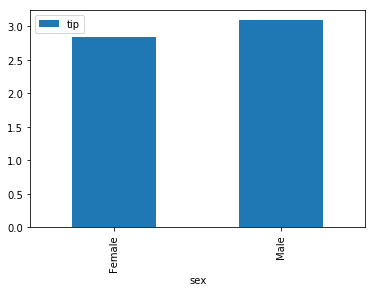

In [370]:
graph.plot.bar()

----

# 시각화

In [371]:
import matplotlib.pyplot as plt

In [372]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [399]:
plt.style.use('ggplot')

### notebook option 추가
- 쓸모없음

In [408]:
%matplotlib notebook

### notebook option 초기화

In [417]:
%matplotlib inline

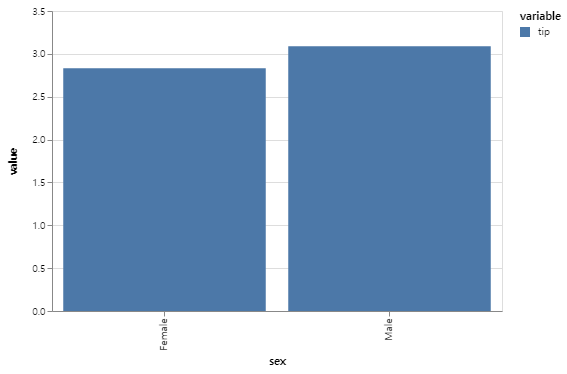

In [414]:
graph.vgplot.bar()

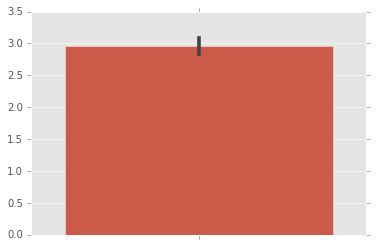

In [429]:
sns.barplot(graph.T, orient='v')

In [428]:
graph

,tip
sex,
Female,2.833448
Male,3.089618


----

### 요일 별 팁을 어떻게 줄까?

In [431]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [433]:
graph2 = pd.pivot_table(data,index=['day'], values='tip')

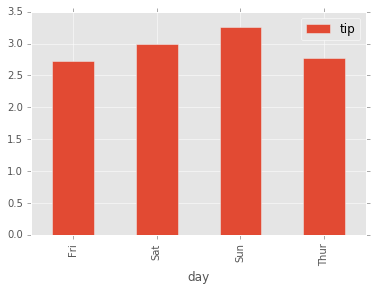

In [436]:
graph2.plot.bar()

### seaborn 에서 iris 데이터를 가져와보자.

In [437]:
iris = sns.load_dataset('iris')

In [439]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 개쩐다.

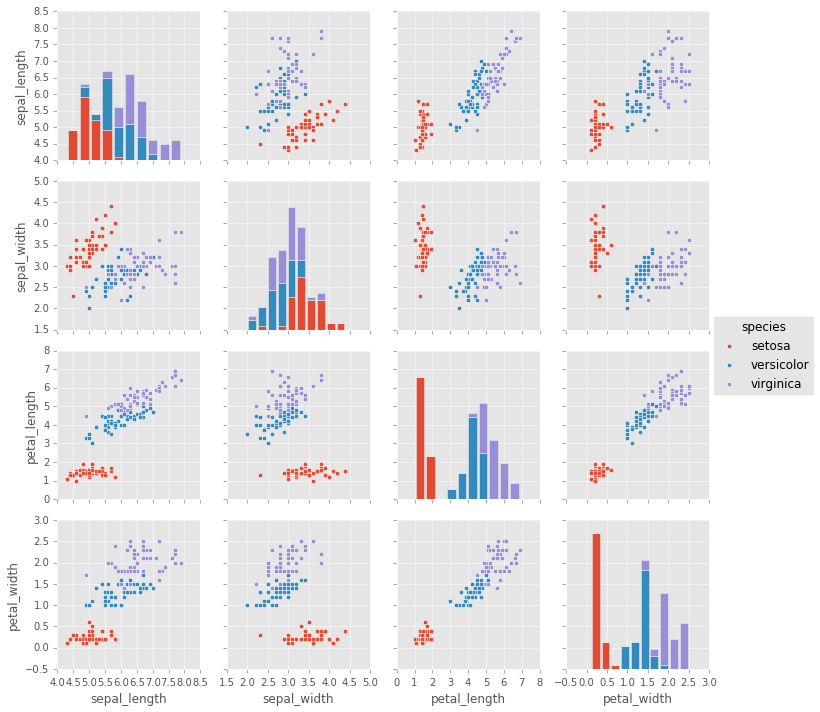

In [443]:
sns.pairplot(iris, hue='species')

In [449]:
import seaborn as sns
from bokeh.plotting import figure
from bokeh.embed import components

data = sns.load_dataset('tips')
data2 = data.groupby(['smoker']).mean().tip

In [452]:
data2.values

array([3.00870968, 2.9918543 ])

In [462]:
data2.values[0]

3.008709677419355